In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('cleaned_ebay_deals.csv')

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp')

In [4]:
df['hour'] = df['timestamp'].dt.hour

In [5]:
deals_per_hour = df.groupby('hour').size()

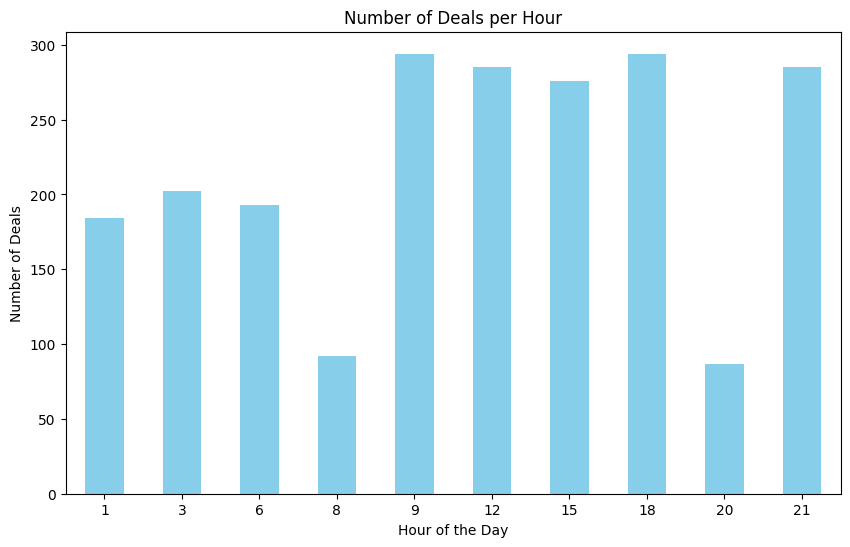

In [6]:
plt.figure(figsize=(10, 6))
deals_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Deals per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.show()

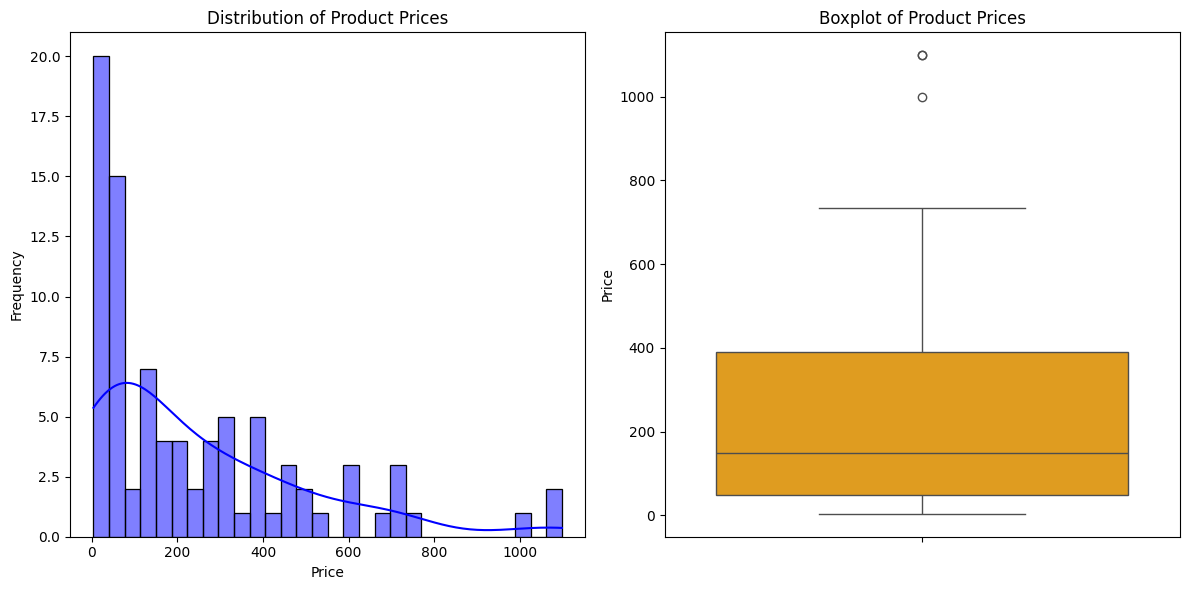

In [7]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'], color='orange')
plt.title('Boxplot of Product Prices')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

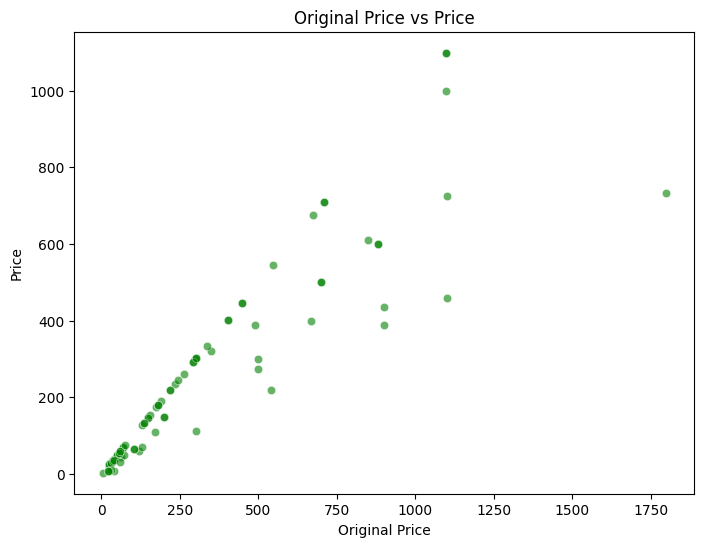

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='original_price', y='price', data=df, alpha=0.6, color='green')
plt.title('Original Price vs Price')
plt.xlabel('Original Price')
plt.ylabel('Price')
plt.show()

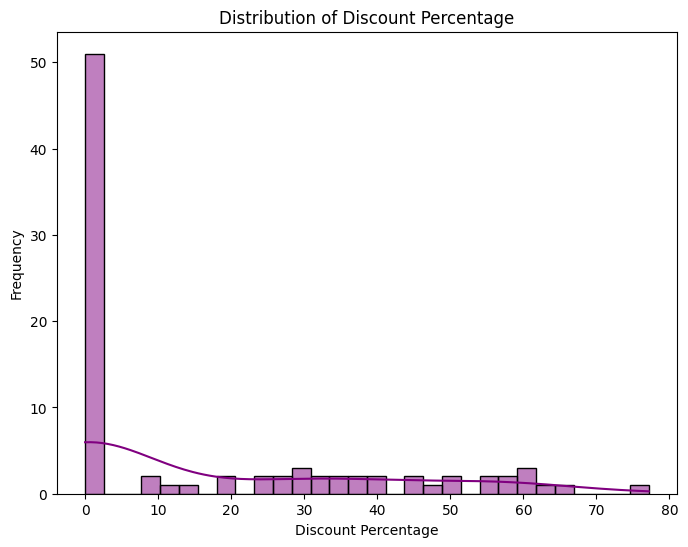

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='purple')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()

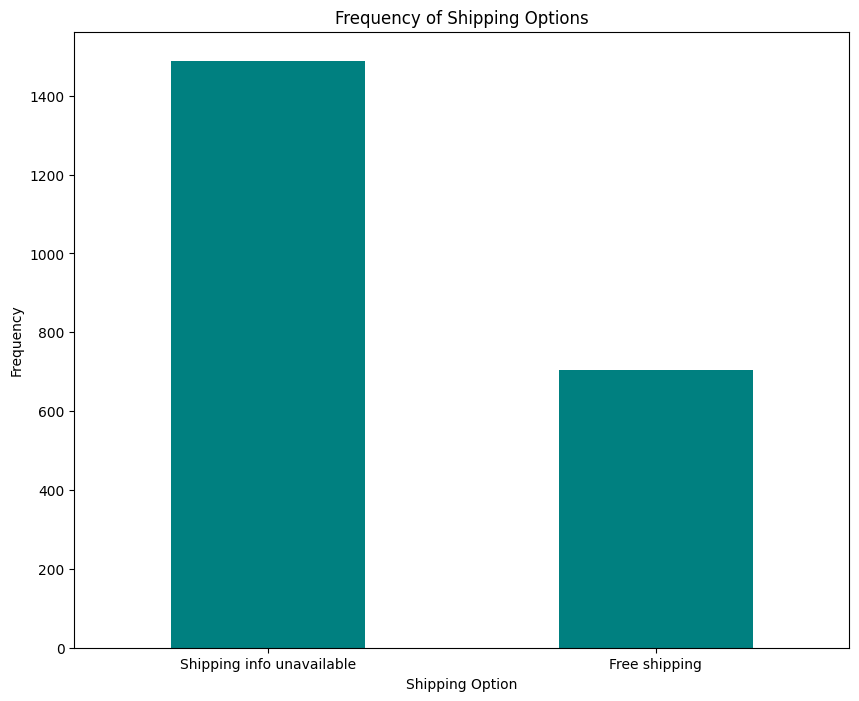

In [10]:
shipping_counts = df['shipping'].value_counts()

plt.figure(figsize=(10, 8))
shipping_counts.plot(kind='bar', color='teal')
plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency')
plt.xticks(rotation=360)
plt.show()

In [11]:
keywords = ['Apple', 'Samsung', 'Laptop', 'iPhone', 'Tablet', 'Gimbal']
keyword_counts = {keyword: df['title'].str.contains(keyword, case=False).sum() for keyword in keywords}
keyword_counts = pd.Series(keyword_counts)

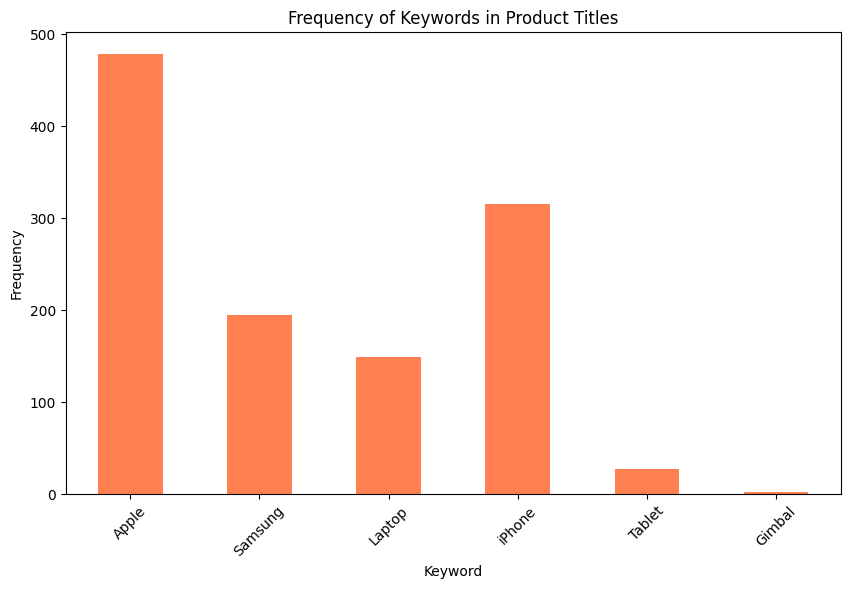

In [12]:
plt.figure(figsize=(10, 6))
keyword_counts.plot(kind='bar', color='coral')
plt.title('Frequency of Keywords in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

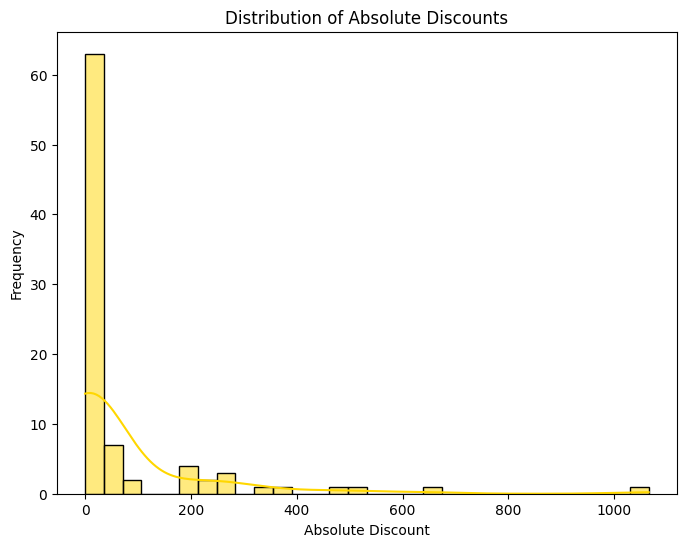

In [13]:
df['absolute_discount'] = df['original_price'] - df['price']

plt.figure(figsize=(8, 6))
sns.histplot(df['absolute_discount'], bins=30, kde=True, color='gold')
plt.title('Distribution of Absolute Discounts')
plt.xlabel('Absolute Discount')
plt.ylabel('Frequency')
plt.show()

In [14]:
top_discounts = df.sort_values(by='discount_percentage', ascending=False).head(5)
print(top_discounts[['title', 'price', 'original_price', 'discount_percentage']])

                                                title   price  original_price  \
71  Six Feet Under: Complete Third 3rd Season 3 (D...    9.12           39.95   
67  Otto the Rhino DVD 2012 Animated English Versi...    8.88           24.95   
54  Sony WF-1000XM5 Truly Wireless Bluetooth Noise...  112.99          299.99   
68  4 Movie Collection Comedy Life / Roscoe Jenkin...   11.57           28.95   
17       DJI Ronin-SC Gimbal Stabilizer Pro Combo Kit  218.00          539.00   

    discount_percentage  
71                77.17  
67                64.41  
54                62.34  
68                60.03  
17                59.55  
